In [1]:
%matplotlib inline  

import os
import re
import numpy as np
import pandas as pd
import pickle
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import json
from static_gamma_parser import get_exp_result
from utils.distribution import distr_profile


#fig_width = 10
#plt.rcParams["figure.figsize"] = (fig_width, 6)
#plt.rcParams['font.size'] = 22



Bad key text.latex.preview in file /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

In [2]:
data_distr = 'gbalan' # htail, cus
VI = 3
epoch = 1000
fig_zoom = 0.3

# compare over datasets
acc_threshold = 95
metrics = {'ACC':[], 'ETA':[], 'TTA':[]}
x_labels = []
y_labels = ['Final Accuracy (%)',
            'Epoch to Accuracy',
            'Time to Accuracy (sec)']
y_lim = [80, epoch, 4000]
'''
y_labels = ['Final Accuracy(%)',
            'Epoch to Reach {}% Best Acc'.format(acc_threshold),
            'Time to Reach {}% Best Acc'.format(acc_threshold)]
'''
legends = {'fedavg':'FedAvg', 
           'oort_e0.8':'Oort', 
           'algo1_r0.1_e0.8':'Fedcism-$\gamma=0.1$',
           'algo1_r1.0_e0.8':'Fedcism-$\gamma=1$',
           'algo1_r10.0_e0.8':'Fedcism-$\gamma=10$',
           'algo3_deg1_e0.8_wof100':'Fedcism'
          }
legends = {'fedavg':'FedAvg', 
           'oort_e0.8':'$\gamma=0$', 
           'algo1_r0.1_e0.8':'$\gamma=0.1$',
           'algo1_r1.0_e0.8':'$\gamma=1$',
           'algo1_r10.0_e0.8':'$\gamma=10$',
           'algo3_deg1_e0.8_wof100':'adaptive-$\gamma$'
          }
textures = ['xx', '//', None, '..']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



=== cifar10 - cossim2 - shard2 - select100*0.1 ===
algorithms
['utility_c0.1', 'algo1_r0.1', 'algo1_r2.0']

bacc summary: [55.77, 58.66, 59.97] -> max: 58.66
target_acc: 55.72700, 95% of bacc 

required epoch
[629.0, 548.0, 509.0]
['1.00x', '1.15x', '1.24x']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


required time_simu
[4385.0, 3817.0, 3520.0]
['1.00x', '1.15x', '1.25x']


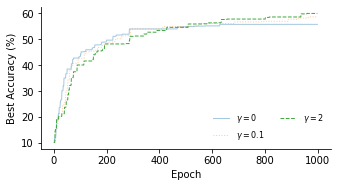

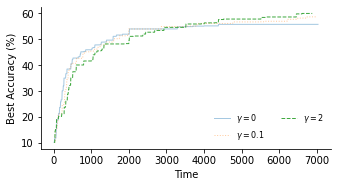

In [4]:
# old
dataset = 'cifar10'
shard_per_user = 2
frac = 0.1
legends={
    'utility_c0.1': '$\gamma=0$',
    'algo1_r0.1': '$\gamma=0.1$',
    #'algo1_r1.0': '$\gamma=1$',
    'algo1_r2.0': '$\gamma=2$'#,
    #'algo3_deg1_e0.8_wof100_e1000':'adaptive-$\gamma$'
}
result_folder = 'cossim2'
RUN = 0
data_distr_file = 'unbalanced_dict_users_2.pkl'
algos, color_algos, bacc_algos, required_time = get_exp_result(
    dataset, data_distr, VI, RUN, data_distr_file, result_folder, legends,
    shard_per_user, frac, acc_threshold, fig_zoom, epoch, show_fig=True, save=True)


=== cifar10 - cossim_gbalan_vi3_r0 - shard10 - select100*0.1 ===
algorithms
['oort_e0.8', 'algo1_r0.1_e0.8', 'algo1_r1.0_e0.8', 'algo3_deg1_e0.8_wof100']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



bacc summary: [64.58, 63.93, 63.39, 64.46] -> max: 63.39
target_acc: 60.22050, 95% of bacc 

required epoch
[257, 238, 261, 248]
['1.02x', '1.10x', '1.00x', '1.05x']
required time_simu
[1600.0, 1485.0, 1646.0, 1539.0]
['1.03x', '1.11x', '1.00x', '1.07x']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



=== cifar10 - cossim_gbalan_vi3_r1 - shard10 - select100*0.1 ===
algorithms
['oort_e0.8', 'algo1_r0.1_e0.8', 'algo1_r1.0_e0.8', 'algo3_deg1_e0.8_wof100']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



bacc summary: [64.77, 64.83, 64.31, 64.81] -> max: 64.31
target_acc: 61.09450, 95% of bacc 

required epoch
[296, 295, 293, 301]
['1.02x', '1.02x', '1.03x', '1.00x']
required time_simu
[1917.0, 1864.0, 1908.0, 1960.0]
['1.02x', '1.05x', '1.03x', '1.00x']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



=== cifar10 - cossim_gbalan_vi3_r2 - shard10 - select100*0.1 ===
algorithms
['oort_e0.8', 'algo1_r0.1_e0.8', 'algo1_r1.0_e0.8', 'algo3_deg1_e0.8_wof100']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



bacc summary: [64.77, 64.97, 65.05, 65.18] -> max: 64.97
target_acc: 61.72150, 95% of bacc 

required epoch
[284, 253, 294, 271]
['1.04x', '1.16x', '1.00x', '1.08x']
required time_simu
[1945.0, 1731.0, 1996.0, 1825.0]
['1.03x', '1.15x', '1.00x', '1.09x']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



=== cifar10 - cossim_gbalan_vi3_r0 - shard10 - select100*0.05 ===
algorithms
['oort_e0.8', 'algo1_r0.1_e0.8', 'algo1_r1.0_e0.8', 'algo3_deg1_e0.8_wof100']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



bacc summary: [63.39, 61.89, 61.66, 63.2] -> max: 61.66
target_acc: 58.57700, 95% of bacc 

required epoch
[246, 257, 263, 232]
['1.07x', '1.02x', '1.00x', '1.13x']
required time_simu
[1268.0, 1264.0, 1417.0, 1194.0]
['1.12x', '1.12x', '1.00x', '1.19x']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



=== cifar10 - cossim_gbalan_vi3_r1 - shard10 - select100*0.05 ===
algorithms
['oort_e0.8', 'algo1_r0.1_e0.8', 'algo1_r1.0_e0.8', 'algo3_deg1_e0.8_wof100']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



bacc summary: [61.58, 61.0, 62.29, 62.57] -> max: 61.0
target_acc: 57.95000, 95% of bacc 

required epoch
[224, 274, 251, 281]
['1.25x', '1.03x', '1.12x', '1.00x']
required time_simu
[1168.0, 1561.0, 1345.0, 1435.0]
['1.34x', '1.00x', '1.16x', '1.09x']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



=== cifar10 - cossim_gbalan_vi3_r2 - shard10 - select100*0.05 ===
algorithms
['oort_e0.8', 'algo1_r0.1_e0.8', 'algo1_r1.0_e0.8', 'algo3_deg1_e0.8_wof100']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



bacc summary: [61.09, 61.63, 61.86, 61.52] -> max: 61.52
target_acc: 58.44400, 95% of bacc 

required epoch
[256, 229, 259, 284]
['1.11x', '1.24x', '1.10x', '1.00x']
required time_simu
[1428.0, 1328.0, 1416.0, 1588.0]
['1.11x', '1.20x', '1.12x', '1.00x']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



=== cifar10 - cossim_gbalan_vi3_r0 - shard2 - select100*0.1 ===
algorithms
['oort_e0.8', 'algo1_r0.1_e0.8', 'algo1_r1.0_e0.8', 'algo3_deg1_e0.8_wof100']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/home/yhyeh/LG-FedAvg/static_gamma_parser.py:263: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=fig_size)



bacc summary: [55.6, 56.68, 56.22, 56.52] -> max: 56.22
target_acc: 53.40900, 95% of bacc 

required epoch
[327, 267, 311, 217]
['1.00x', '1.22x', '1.05x', '1.51x']
required time_simu
[2250.0, 1852.0, 2105.0, 1487.0]
['1.00x', '1.21x', '1.07x', '1.51x']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



=== cifar10 - cossim_gbalan_vi3_r1 - shard2 - select100*0.1 ===
algorithms
['oort_e0.8', 'algo1_r0.1_e0.8', 'algo1_r1.0_e0.8', 'algo3_deg1_e0.8_wof100']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



bacc summary: [58.57, 59.23, 58.18, 58.66] -> max: 58.18
target_acc: 55.27100, 95% of bacc 

required epoch
[339, 258, 253, 256]
['1.00x', '1.31x', '1.34x', '1.32x']
required time_simu
[2166.0, 1682.0, 1687.0, 1639.0]
['1.00x', '1.29x', '1.28x', '1.32x']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



=== cifar10 - cossim_gbalan_vi3_r2 - shard2 - select100*0.1 ===
algorithms
['oort_e0.8', 'algo1_r0.1_e0.8', 'algo1_r1.0_e0.8', 'algo3_deg1_e0.8_wof100']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



bacc summary: [56.6, 55.7, 57.91, 57.17] -> max: 55.7
target_acc: 52.91500, 95% of bacc 

required epoch
[306, 310, 205, 217]
['1.01x', '1.00x', '1.51x', '1.43x']
required time_simu
[2148.0, 2199.0, 1460.0, 1550.0]
['1.02x', '1.00x', '1.51x', '1.42x']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



=== cifar10 - cossim_gbalan_vi3_r0 - shard2 - select100*0.05 ===
algorithms
['oort_e0.8', 'algo1_r0.1_e0.8', 'algo1_r1.0_e0.8', 'algo3_deg1_e0.8_wof100']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



bacc summary: [47.85, 51.53, 51.84, 48.56] -> max: 48.56
target_acc: 46.13200, 95% of bacc 

required epoch
[332, 224, 221, 336]
['1.01x', '1.50x', '1.52x', '1.00x']
required time_simu
[1988.0, 1402.0, 1352.0, 1961.0]
['1.00x', '1.42x', '1.47x', '1.01x']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



=== cifar10 - cossim_gbalan_vi3_r1 - shard2 - select100*0.05 ===
algorithms
['oort_e0.8', 'algo1_r0.1_e0.8', 'algo1_r1.0_e0.8', 'algo3_deg1_e0.8_wof100']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



bacc summary: [55.36, 55.91, 56.85, 55.42] -> max: 55.42
target_acc: 52.64900, 95% of bacc 

required epoch
[358, 210, 224, 299]
['1.00x', '1.70x', '1.60x', '1.20x']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


required time_simu
[1866.0, 1151.0, 1173.0, 1583.0]
['1.00x', '1.62x', '1.59x', '1.18x']

=== cifar10 - cossim_gbalan_vi3_r2 - shard2 - select100*0.05 ===
algorithms
['oort_e0.8', 'algo1_r0.1_e0.8', 'algo1_r1.0_e0.8', 'algo3_deg1_e0.8_wof100']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



bacc summary: [50.61, 51.33, 52.64, 53.22] -> max: 51.33
target_acc: 48.76350, 95% of bacc 

required epoch
[350, 319, 235, 328]
['1.00x', '1.10x', '1.49x', '1.07x']
required time_simu
[2097.0, 1871.0, 1501.0, 1962.0]
['1.00x', '1.12x', '1.40x', '1.07x']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


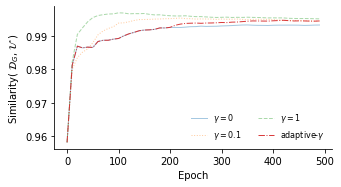

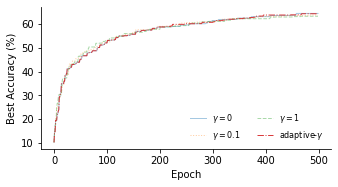

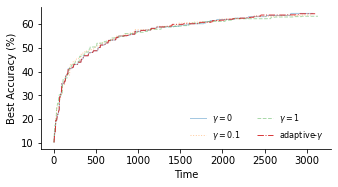

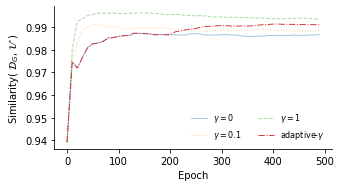

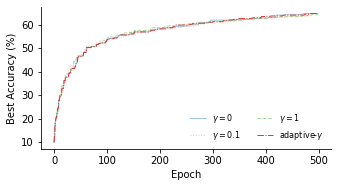

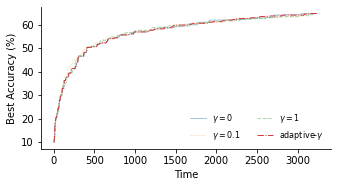

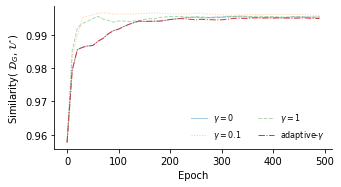

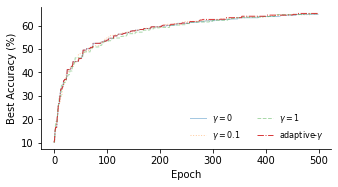

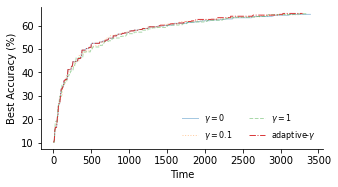

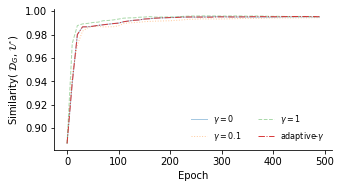

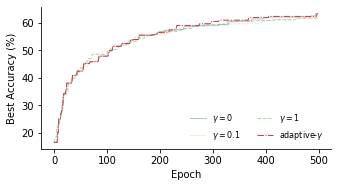

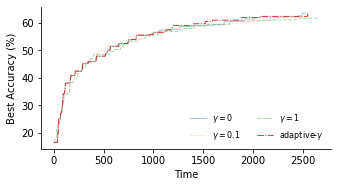

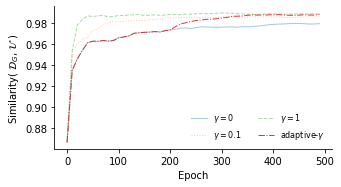

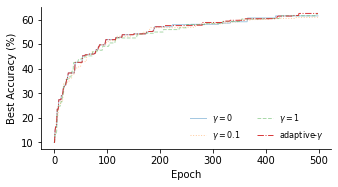

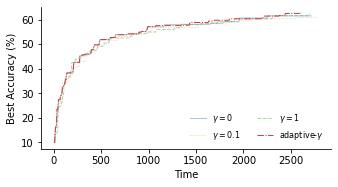

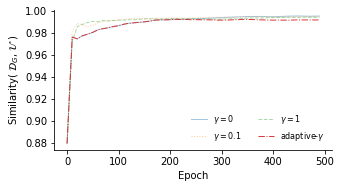

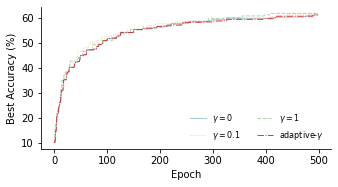

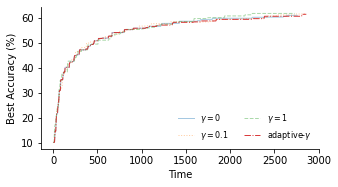

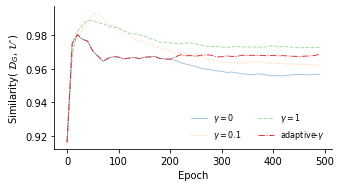

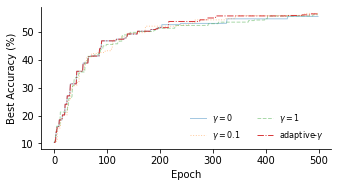

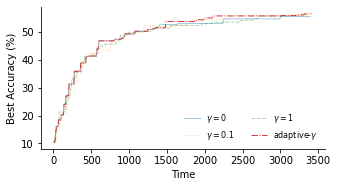

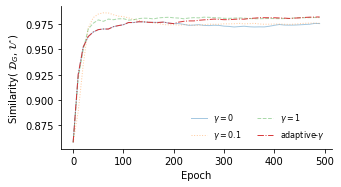

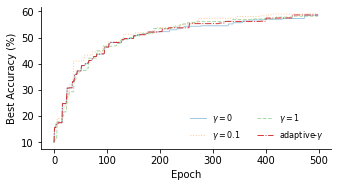

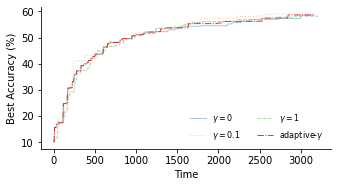

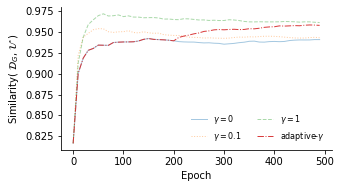

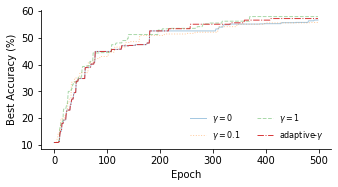

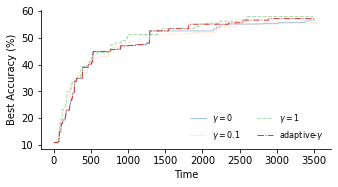

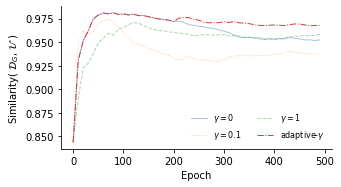

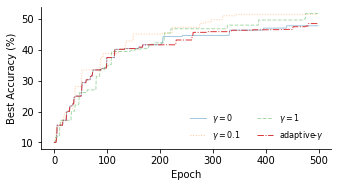

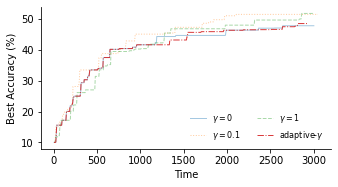

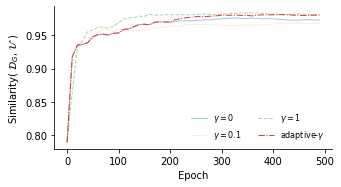

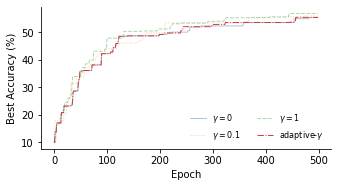

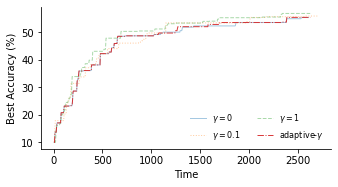

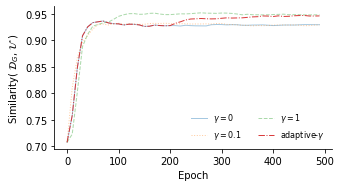

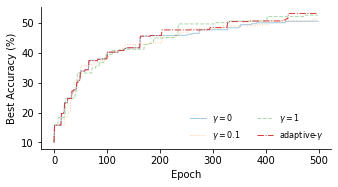

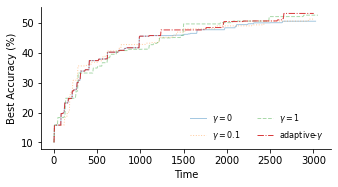

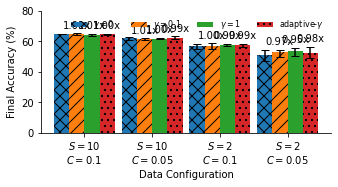

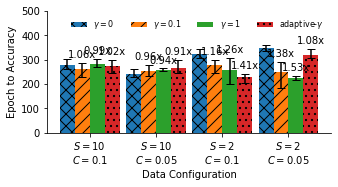

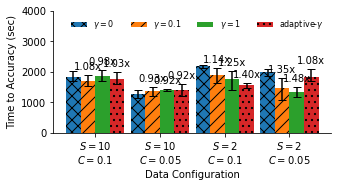

In [2]:
# new
for dataset in ['cifar10']:
    for shard_per_user in [10, 2]:
        for frac in [0.1, 0.05]:
            x_labels.append('$S={}$\n$C={}$'.format(shard_per_user, frac))
            bacc_stack = []
            TTAe_stack = []
            TTAt_stack = []
            
            for RUN in range(3):
        
                data_distr_file = '{}_dict_users_vi{}_r{}.pkl'.format(data_distr, VI, RUN)
                result_folder = 'cossim_{}_vi{}_r{}'.format(data_distr, VI, RUN)
                '''if frac == 0.1:
                    dpath = 'save/{}/data_distr/num100/shard{}/{}'.format(dataset, shard_per_user, data_distr_file)
                    profile = distr_profile(dpath)
                    _ =profile.plot_local_distr(shard_per_user)
    '''
                algos, color_algos, bacc_algos, required_time = get_exp_result(
                    dataset, data_distr, VI, RUN, data_distr_file, result_folder, legends,
                    shard_per_user, frac, acc_threshold, fig_zoom, show_fig=True, save=False)

                bacc_stack.append(bacc_algos)
                TTAe_stack.append(required_time['epoch'])
                TTAt_stack.append(required_time['time_simu'])
            
            metrics['ACC'].append(bacc_stack)
            metrics['ETA'].append(TTAe_stack)
            metrics['TTA'].append(TTAt_stack)
    
    # summary 
    x = np.arange(len(x_labels))
    for i, (k, v) in enumerate(metrics.items()):
        fig, ax = plt.subplots(figsize=(16*fig_zoom, 9*fig_zoom))
        #plt.title('{} - {} - vi{}'.format(dataset, data_distr, VI), y=1.1)
        if data_distr == 'cus': # alias
            fig_name = '{}_{}_vi{}'.format(k, 'sparsez', VI)
        else:            
            fig_name = '{}_{}_vi{}'.format(k, data_distr, VI)
        fig_path = os.path.join('save', dataset, 'fig', fig_name)
        
        cur_algos = algos
        cur_v_T = v_T = np.array(v).T
        '''
        if 'TA' in k:
            cur_algos = algos[1:]
            cur_v_T = v_T[1:] # [algo][run][data_config]
        '''
        for aidx, algo in enumerate(cur_algos):
            w = 0.9/len(cur_algos)
            y_avg = cur_v_T[aidx].mean(axis=0)
            y_max = cur_v_T[aidx].max(axis=0)
            y_min = cur_v_T[aidx].min(axis=0)
            y_err = np.vstack((y_max-y_avg, y_avg-y_min))
            
            p = ax.bar(x+aidx*w-0.45+w/2, y_avg, yerr=y_err, 
                            label=legends[algo], width=w,
                            capsize=4, hatch=textures[aidx])
            '''
            if k == 'ACC':
                p = ax.bar(x+aidx*w-0.45+w/2, y_avg, yerr=y_err, 
                            label=legends[algo], width=w,
                            capsize=4, hatch=textures[aidx])
            else:
                p = ax.bar(x+aidx*w-0.45+w/2, y_avg, yerr=y_err, 
                            label=legends[algo], width=w, color=color_algos[aidx+1],
                            capsize=4, hatch=textures[aidx+1])
            '''   
                
            if aidx == 0:
                base_yavg = y_avg
            else:
                txt = ['{:.2f}x'.format(x) for x in base_yavg/y_avg]
                ax.bar_label(p, labels=txt, padding=3)

        ax.set_ylabel(y_labels[i])
        ax.set_xlabel('Data Configuration')
        ax.set_ylim(top=y_lim[i])
        ax.set_xticks(x, labels=x_labels)#, rotation='vertical')
        #fig.legend(fancybox=True, shadow=True, fontsize=16,
        #                      loc='lower left', bbox_to_anchor=(1, 0))
        ax.legend(fontsize=8, ncol=len(cur_algos), frameon=False)

        # Hide the right and top spines
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
    
        fig.tight_layout()
        #fig.savefig('{}.{}'.format(fig_path, 'png'), format='png', transparent=True)
        #fig.savefig('{}.{}'.format(fig_path, 'eps'), format='eps', transparent=True)